In [1]:
# Importing the important libraries for this problem
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as patches 

#%matplotlib inline

In [2]:
# dataset of 24 colors, each color has RGB
raw_data = [[0,255,255,0,0,255,0,255,192,128,128,128,0,128,0,0,139,255,188,165,184,124,70,221],
            [0,255,0,255,0,255,255,0,192,128,0,128,128,0,128,0,0,215,143,42,134,252,130,160],
            [0,255,0,0,255,0,255,255,192,128,0,0,0,128,128,128,0,0,143,42,11,0,180,221]]
# converting the list to array
raw_data=np.array(raw_data)
raw_data.shape

# the 24 colors are Black, White, Red, Lime, Blue, Yellow, Cyan, Magenta, Silver, Gray,
# ,Maroon, Olive, Green, Purplr, Teal, Navy, dark red,gold,rosy brown,brown,dark golden rod,lawn green,steel blue,plum


(3, 24)

In [3]:
# assigning network_dimention as 100*100 neurons
network_dimensions = np.array([100, 100])
n_iterations = 1000               # 1000 number of iterations
init_learning_rate = 0.8          # starting learning rate of 0.8


In [4]:
# m is number of features and n is length of the dataset
m = raw_data.shape[0]
n = raw_data.shape[1]
# initial neighbourhood radius
# 𝜎 = 1, 10, 30, 50, 70. 
init_radius = [1,10,30,50,70]

# normalization the dataset and getting everything between the range of 0 and 1
data = raw_data / 255

# Creating a weight metrics by randomly selecting the weights
net = np.random.random((network_dimensions[0], network_dimensions[1], m))

In [5]:
# the function to find the winning unit/neuron
# it returns the winning unit and the it's index
def find_bmu(t, net, m):
    # initializing the index and minimum distance
    bmu_idx = np.array([0, 0])
    min_dist = np.iinfo(np.int).max
    
    # calculate the distance between each neuron and the input and deciding the final winner
    for x in range(net.shape[0]):
        for y in range(net.shape[1]):
            w = net[x, y, :].reshape(m, 1)
            sq_dist = np.sum((w - t) ** 2)
            sq_dist = np.sqrt(sq_dist)
            if sq_dist < min_dist:
                min_dist = sq_dist # dist
                bmu_idx = np.array([x, y]) # id
    # getting the winning node
    bmu = net[bmu_idx[0], bmu_idx[1], :].reshape(m, 1)
    # returning the values
    return (bmu, bmu_idx)

In [6]:
# function to calculate the decay radius - sigma(k)
def decay_radius(initial_radius, i, n_iterations):
    return initial_radius * np.exp(-i / n_iterations)

# function to calculate the learning rate decay
def decay_learning_rate(initial_learning_rate, i, n_iterations):
    return initial_learning_rate * np.exp(-i / n_iterations)

# function to calculate the neighbourhood influence using decay radius
def calculate_influence(distance, radius):
    return np.exp(-distance / (2* (radius**2)))

# Function to plot/ visualize the 100 * 100 neuron
def visualization(net, number_of_iterations,init_radius):
    # creating a subplot/ figure
    fig = plt.figure()
    ax = fig.add_subplot(111, aspect='equal')
    # setting x and y limit of the figure
    ax.set_xlim((0, net.shape[0]+1))
    ax.set_ylim((0, net.shape[1]+1))
    # giving title to the plot/ visualization
    ax.set_title('Self-Organising Map after %d iterations and initial radius(σ) of %d' %(number_of_iterations,init_radius))

    # Visualizing 100*100 neurons using matplotlib
    for x in range(1, net.shape[0] + 1):
        for y in range(1, net.shape[1] + 1):
            ax.add_patch(patches.Rectangle((x-0.5, y-0.5), 1, 1,
                         facecolor=net[x-1,y-1,:],
                         edgecolor='none'))
    # plotting the visualization
    plt.show()

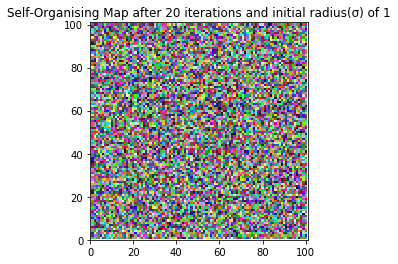

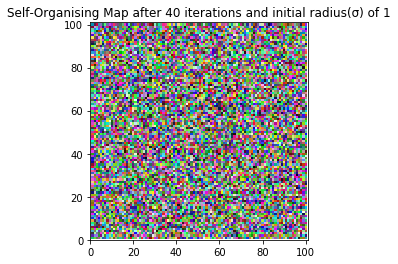

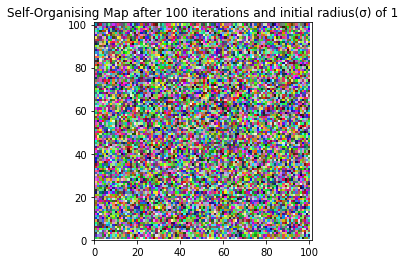

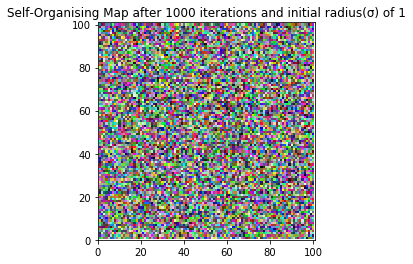

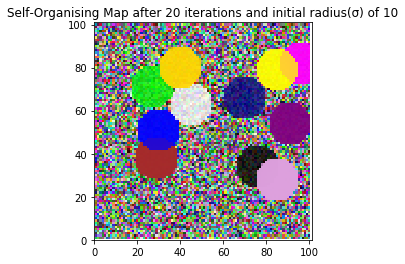

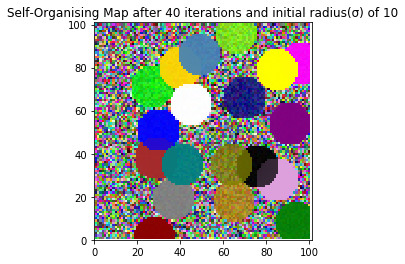

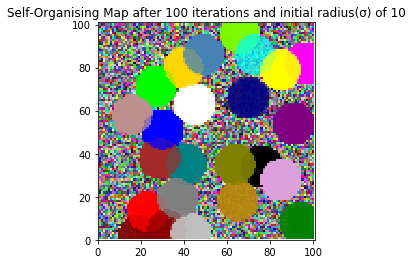

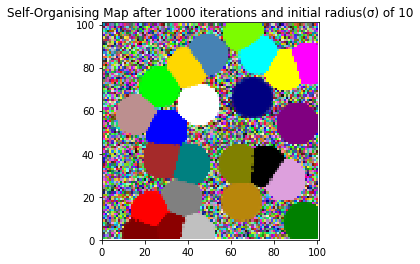

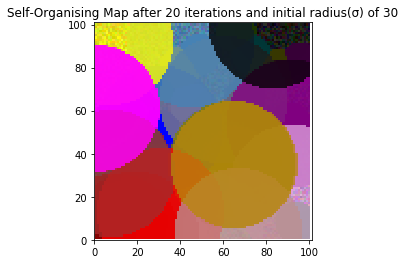

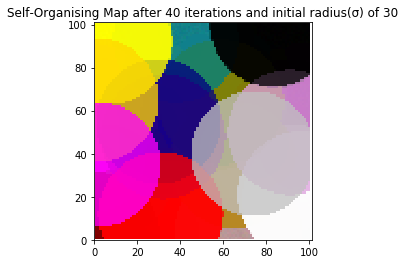

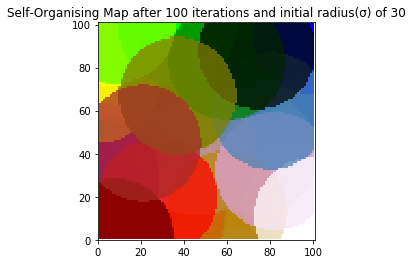

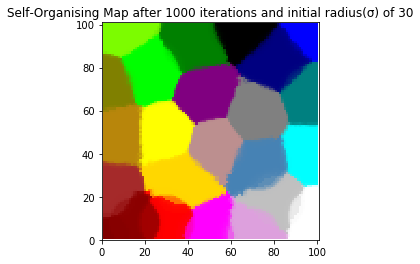

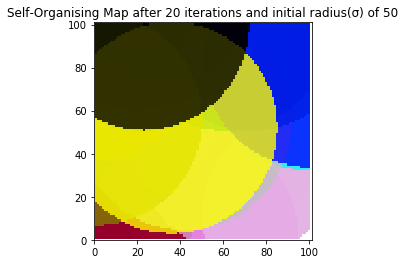

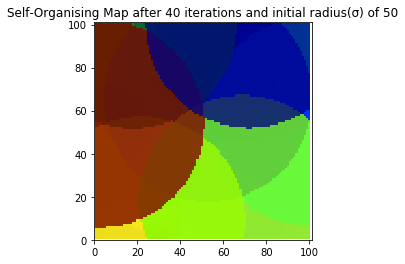

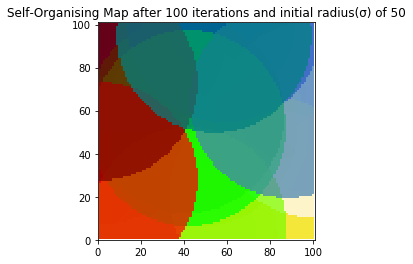

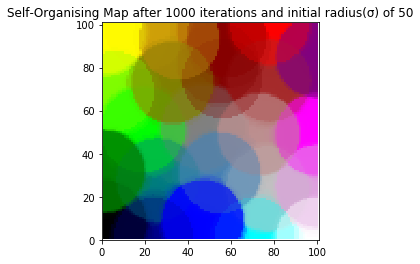

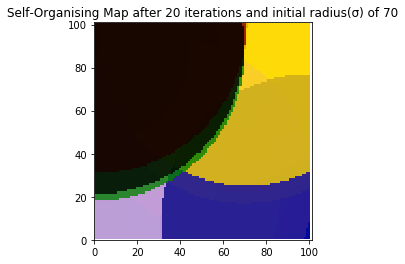

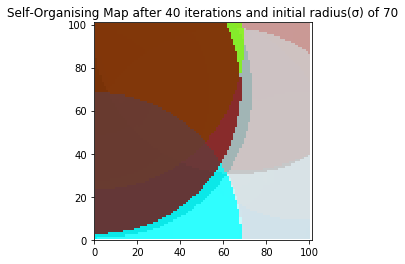

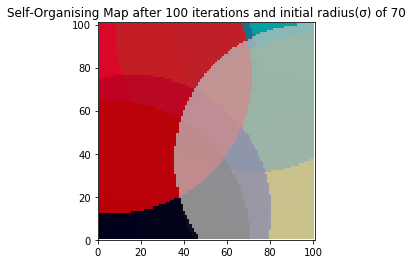

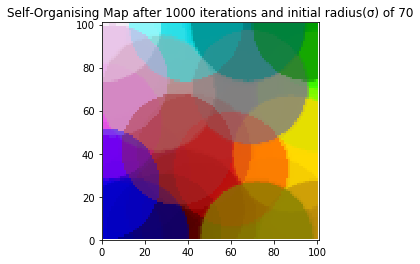

In [7]:
# first for loop is for different initial radius
# next for loop is for 1000 epoches 
for j in range(len(init_radius)):
    for i in range(n_iterations):
        # selecting the training data randomly
        t = data[:, np.random.randint(0, n)].reshape(np.array([m, 1]))

        # finding the winning output node/neuron out of 100*100 neurons based on distance
        bmu, bmu_idx = find_bmu(t, net, m)

        # decay the radius and learning rate of SOM
        r = decay_radius(init_radius[j], i, n_iterations)
        l = decay_learning_rate(init_learning_rate, i, n_iterations)

        # Update the weight vector of the winning node and also of its neighbourhood neurons which are in the radius
        for x in range(net.shape[0]):
            for y in range(net.shape[1]):
                w = net[x, y, :].reshape(m, 1)
                w_dist = np.sum((np.array([x, y]) - bmu_idx) ** 2)
                w_dist = np.sqrt(w_dist)

                if w_dist <= r:
                    # calculating the neighbourhood influence to update the weights of neighbours
                    influence = calculate_influence(w_dist, r)

                    # new w = old w + (learning rate * influence * delta)
                    # where delta = input vector (t) - old w
                    new_w = w + (l * influence * (t - w))
                    net[x, y, :] = new_w.reshape(1, 3)
        # Visualizing the 100*100 neurons after 20,40,100 and 1000 iterations
        if (i == 20):
            visualization(net,i,init_radius[j])
        elif (i == 40):
            visualization(net,i,init_radius[j])
        elif (i == 100):
            visualization(net,i,init_radius[j])
    visualization(net,n_iterations,init_radius[j])